In [1]:
import nbsetup
from models.params import flat_points, large_points, large_z
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FILTER = 'Quality simulation'
xlabel = "predicted"

In [3]:
def plot_n_tune(k, nuissance=False):
    fig, axes = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(8,8))
    namespace = '%s/%s_1' % (k, flat_points)
    namespace = '%s/%s_%s' % (k, large_points, large_z)
    #namespace = '%s/101_7' % k
    print(namespace)
    # standard
    r = Result(load_sparc(namespace=namespace))
    r.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel, axis=axes[0][0])
    display(r.residual_stats())
    
    # all tuning
    analysis = Tune(mcmc(r.datasets()[FILTER], train_k=True, train_d=False))
    tuned = analysis.Result(fast=True, simulations=r.simulations)
    display(tuned.residual_stats())
    tuned.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel, axis=axes[0][1])
    if nuissance:
        analysis.plot_nuissance(figsize=(15,10))
    
    # k and n (i.e. reasonable fit)
    adf = tuned.adjustments[['kappa', 'Galaxy']]
    just_k = Result(r.simulations, adjustments=adf)
    just_k.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel, axis=axes[1][0])

    # just b
    analysis = Tune(mcmc(r.datasets()[FILTER], train_k=True, train_y=True, train_inc=True, train_d=False))
    just_b = analysis.Result(fast=True, simulations=r.simulations)
    display(just_b.residual_stats())
    just_b.plot_rar(kind=0, title=' ', query_key=FILTER, label=xlabel, axis=axes[1][1])
    
    # beta plot
    #fig, axes = plt.subplots(1, 1, sharex=False, sharey=True, figsize=(10,4))
    #sns.lineplot(data=just_b.datasets()[FILTER], y='beta', x='log_M', ax=axes)
    
    return {
        'standard': r,
        'tuned': tuned,
        'just_b': just_b
    }


vector/121_15


,filter,mean,std,count,mse,rmse
0,Everything,-0.035959,0.358090,2059,1,1.0
1,Quality data,-0.035959,0.358090,2059,1,1.0
2,Quality simulation,-0.037814,0.354851,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.007147,0.178585,2059,1,1.0
1,Quality data,-0.007147,0.178585,2059,1,1.0
2,Quality simulation,-0.008562,0.132317,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.007147,0.178585,2059,1,1.0
1,Quality data,-0.007147,0.178585,2059,1,1.0
2,Quality simulation,-0.008562,0.132317,1459,1,1.0


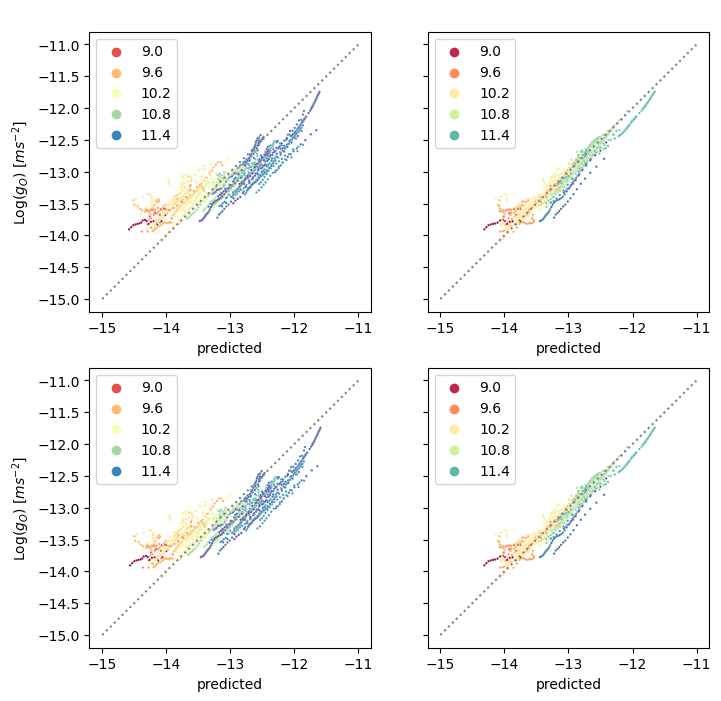

In [4]:
ratio = plot_n_tune('vector')

energy/31_1


,filter,mean,std,count,mse,rmse
0,Everything,-1.794918,1.382474,2059,1,1.0
1,Quality data,-1.794918,1.382474,2059,1,1.0
2,Quality simulation,-1.838351,1.434694,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.298039,0.753917,2059,1,1.0
1,Quality data,-0.298039,0.753917,2059,1,1.0
2,Quality simulation,-0.365960,0.764779,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,0.258081,0.490537,2059,1,1.0
1,Quality data,0.258081,0.490537,2059,1,1.0
2,Quality simulation,0.153856,0.359802,1459,1,1.0


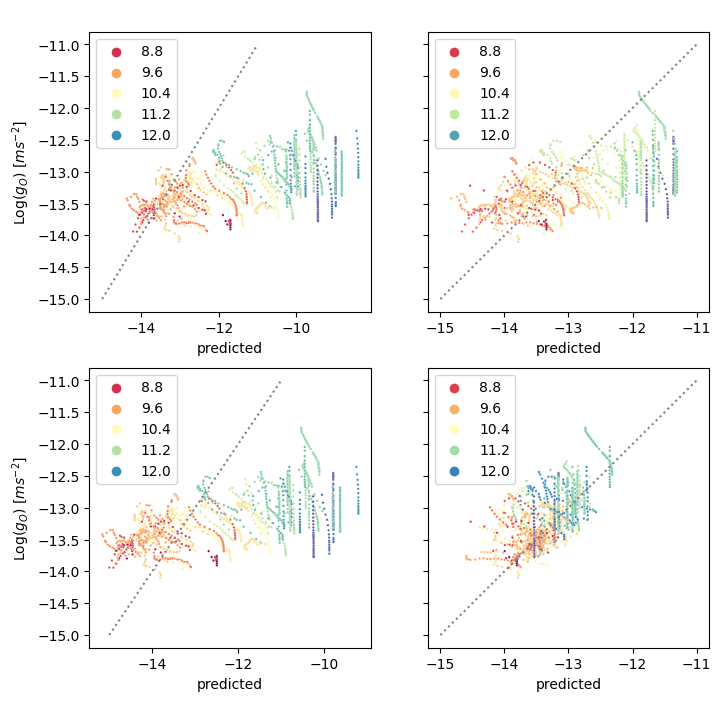

In [6]:
ratio = plot_n_tune('energy')

pmog/31_1


,filter,mean,std,count,mse,rmse
0,Everything,-0.400070,0.741700,2059,1,1.0
1,Quality data,-0.400070,0.741700,2059,1,1.0
2,Quality simulation,-0.324317,0.716374,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.223367,0.333242,2059,1,1.0
1,Quality data,-0.223367,0.333242,2059,1,1.0
2,Quality simulation,-0.172806,0.287728,1459,1,1.0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,filter,mean,std,count,mse,rmse
0,Everything,-0.032795,0.195101,2059,1,1.0
1,Quality data,-0.032795,0.195101,2059,1,1.0
2,Quality simulation,0.001530,0.097057,1459,1,1.0


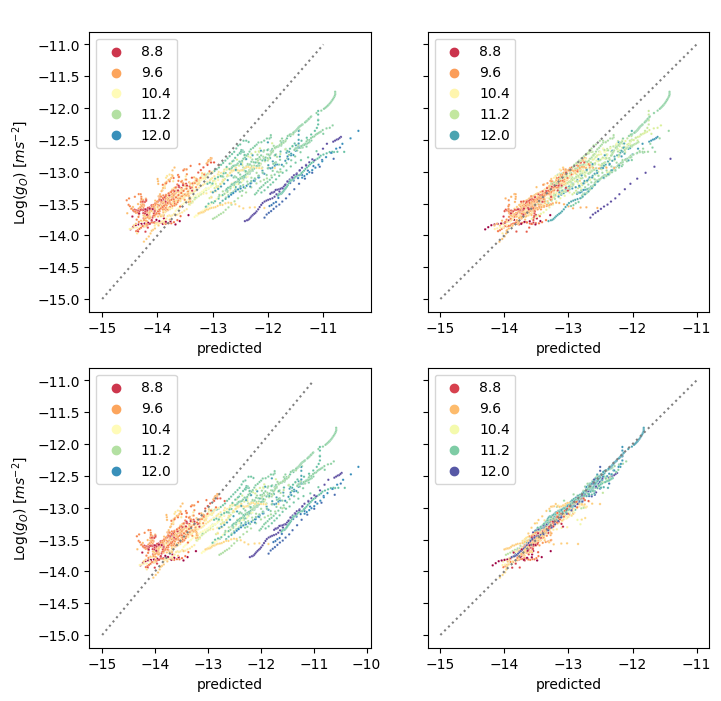

In [7]:
ratio = plot_n_tune('pmog')

ratio/101_7


,filter,mean,std,count,mse,rmse
0,Everything,7.480089,0.417832,2059,1,1.0
1,Quality data,7.480089,0.417832,2059,1,1.0
2,Quality simulation,7.491282,0.406064,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.131823,0.200464,2059,1,1.0
1,Quality data,-0.131823,0.200464,2059,1,1.0
2,Quality simulation,-0.117266,0.162662,1459,1,1.0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,filter,mean,std,count,mse,rmse
0,Everything,-0.006919,0.144756,2059,1,1.0
1,Quality data,-0.006919,0.144756,2059,1,1.0
2,Quality simulation,0.002618,0.054464,1459,1,1.0


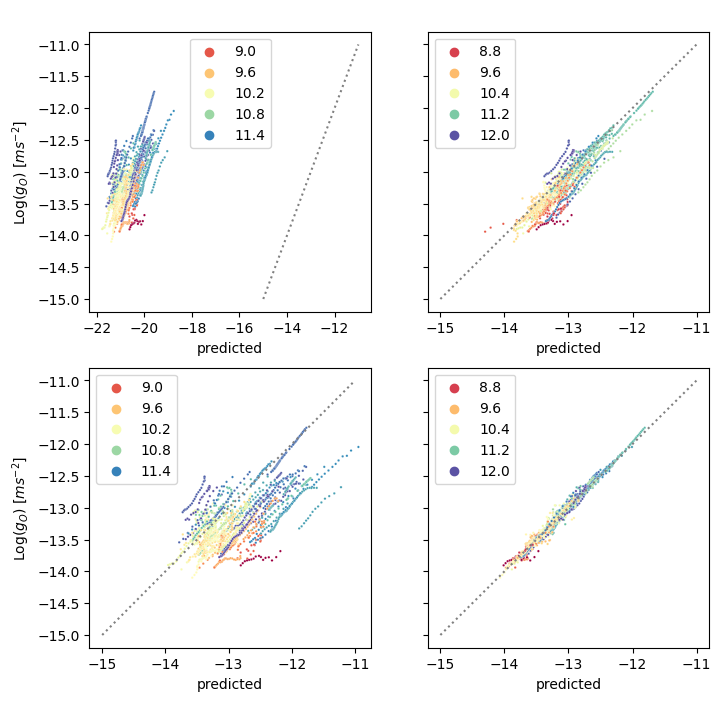

In [6]:
ratio = plot_n_tune('ratio')

tao/101_7


,filter,mean,std,count,mse,rmse
0,Everything,-0.022750,0.348776,2059,1,1.0
1,Quality data,-0.022750,0.348776,2059,1,1.0
2,Quality simulation,-0.027487,0.342672,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.011205,0.180108,2059,1,1.0
1,Quality data,-0.011205,0.180108,2059,1,1.0
2,Quality simulation,-0.013557,0.129901,1459,1,1.0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




,filter,mean,std,count,mse,rmse
0,Everything,0.008630,0.159559,2059,1,1.0
1,Quality data,0.008630,0.159559,2059,1,1.0
2,Quality simulation,0.000571,0.050406,1459,1,1.0


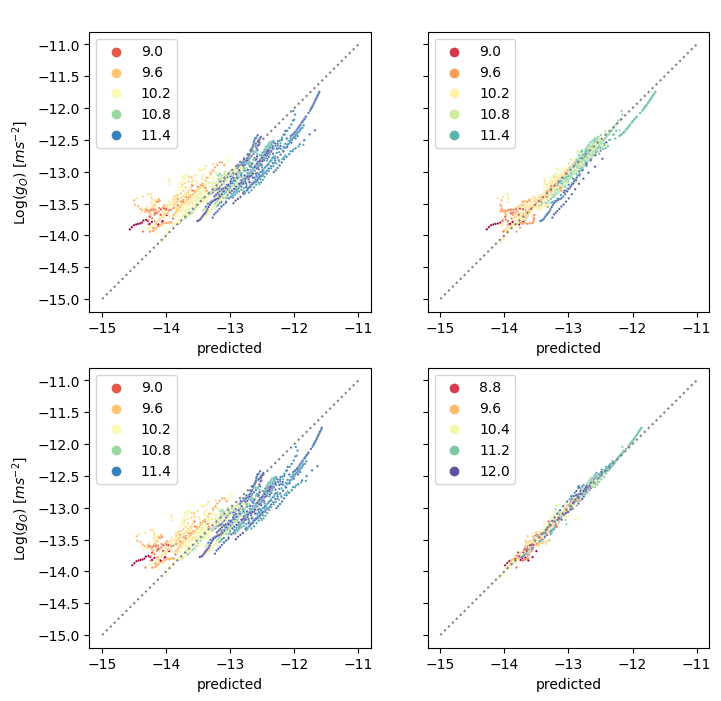

In [7]:
tao = plot_n_tune('tao')

zerg/101_7


,filter,mean,std,count,mse,rmse
0,Everything,2.589658,0.247397,2059,1,1.0
1,Quality data,2.589658,0.247397,2059,1,1.0
2,Quality simulation,2.579663,0.211591,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.004224,0.160805,2059,1,1.0
1,Quality data,-0.004224,0.160805,2059,1,1.0
2,Quality simulation,-0.008899,0.083579,1459,1,1.0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




,filter,mean,std,count,mse,rmse
0,Everything,0.009563,0.159124,2059,1,1.0
1,Quality data,0.009563,0.159124,2059,1,1.0
2,Quality simulation,0.001079,0.049902,1459,1,1.0


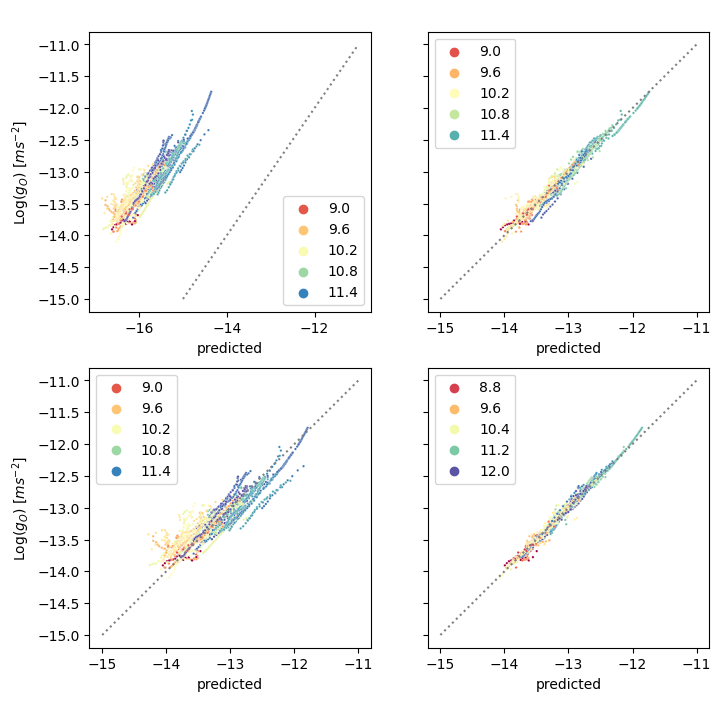

In [8]:
zerg = plot_n_tune('zerg')

lightyear/101_7


,filter,mean,std,count,mse,rmse
0,Everything,-0.022750,0.348776,2059,1,1.0
1,Quality data,-0.022750,0.348776,2059,1,1.0
2,Quality simulation,-0.027487,0.342672,1459,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.011352,0.180199,2059,1,1.0
1,Quality data,-0.011352,0.180199,2059,1,1.0
2,Quality simulation,-0.013739,0.129482,1459,1,1.0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




,filter,mean,std,count,mse,rmse
0,Everything,0.008337,0.159173,2059,1,1.0
1,Quality data,0.008337,0.159173,2059,1,1.0
2,Quality simulation,0.000529,0.050571,1459,1,1.0


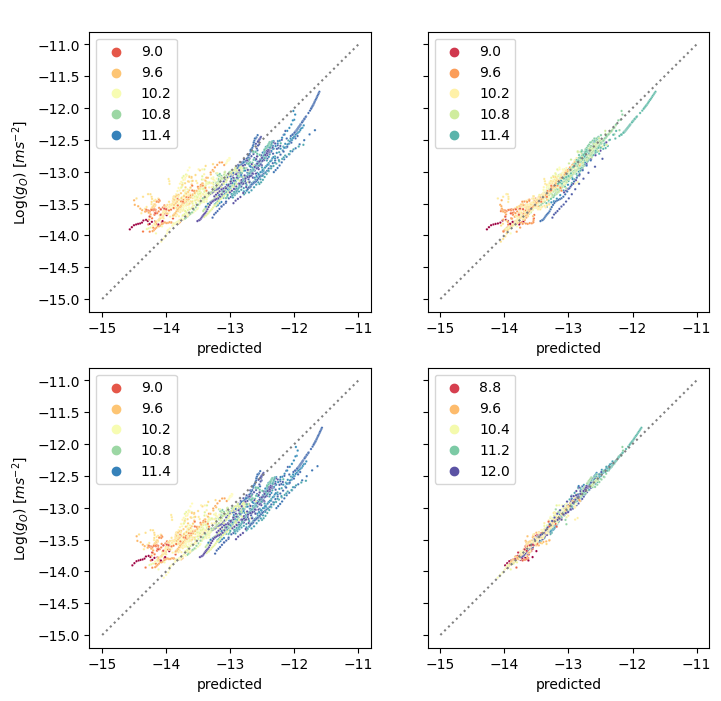

In [9]:
lightyear = plot_n_tune('lightyear')

baseline/101_7


,filter,mean,std,count,mse,rmse
0,Everything,0.230197,0.344030,2096,1,1.0
1,Quality data,0.230197,0.344030,2096,1,1.0
2,Quality simulation,0.290683,0.300604,1482,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.191066,0.231561,2096,1,1.0
1,Quality data,-0.191066,0.231561,2096,1,1.0
2,Quality simulation,-0.147545,0.184587,1482,1,1.0


,filter,mean,std,count,mse,rmse
0,Everything,-0.053317,0.228463,2096,1,1.0
1,Quality data,-0.053317,0.228463,2096,1,1.0
2,Quality simulation,0.008565,0.137931,1482,1,1.0


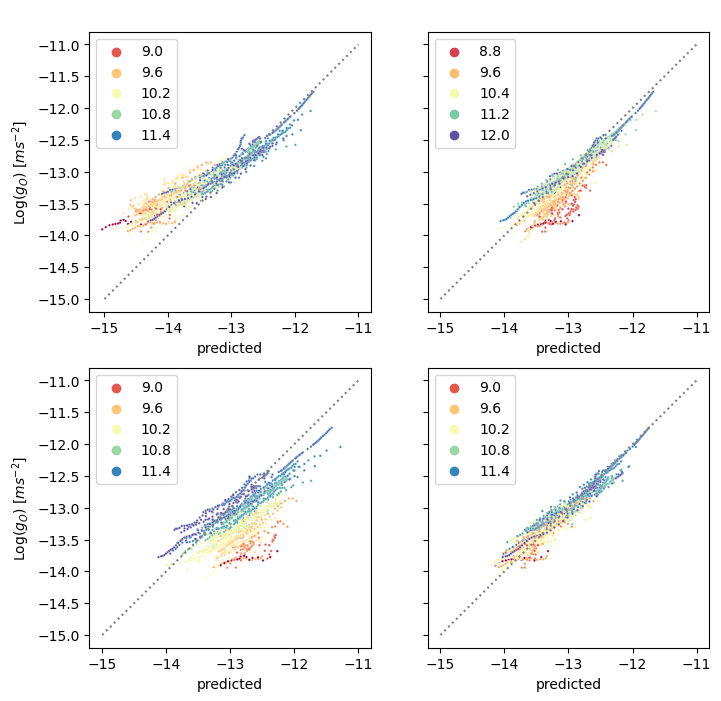

In [10]:
baseline = plot_n_tune('baseline')